In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ieee-fraud-detection/test_identity.csv
/kaggle/input/ieee-fraud-detection/train_identity.csv
/kaggle/input/ieee-fraud-detection/test_transaction.csv
/kaggle/input/ieee-fraud-detection/sample_submission.csv
/kaggle/input/ieee-fraud-detection/train_transaction.csv


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as plt
import seaborn as sns

In [7]:
# Transaction CSV

train_trc = pd.read_csv('../input/ieee-fraud-detection/train_transaction.csv')
test_trc = pd.read_csv('../input/ieee-fraud-detection/test_transaction.csv')

In [4]:
print('train_transaction shape is {}'.format(train_trc.shape))
print('test_transaction shape is {}'.format(test_trc.shape))

train_transaction shape is (590540, 394)
test_transaction shape is (506691, 393)
train_identity shape is (144233, 41)
test_identity shape is (141907, 41)


In [10]:
# Skewed Distribution 
print("{}% are fraud".format(round(train_trc['isFraud'].mean() * 100, 4)))

3.499% are fraud


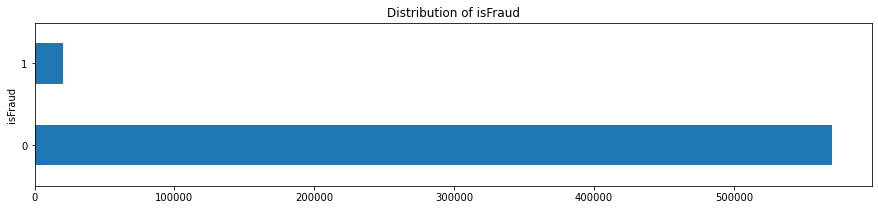

In [12]:
train_trc.groupby('isFraud').count()["TransactionID"].plot(kind='barh', title='Distribution of isFraud', figsize=(15,3))

plt.show()

In [13]:
print('Mean transaction amt for fraud is {:.4f}'.format(train_transaction.loc[train_transaction['isFraud'] == 1]['TransactionAmt'].mean()))
print('Mean transaction amt for non-fraud is {:.4f}'.format(train_transaction.loc[train_transaction['isFraud'] == 0]['TransactionAmt'].mean()))

Mean transaction amt for fraud is 149.2448
Mean transaction amt for non-fraud is 134.5117


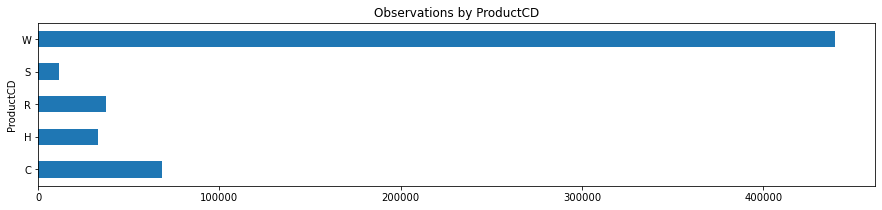

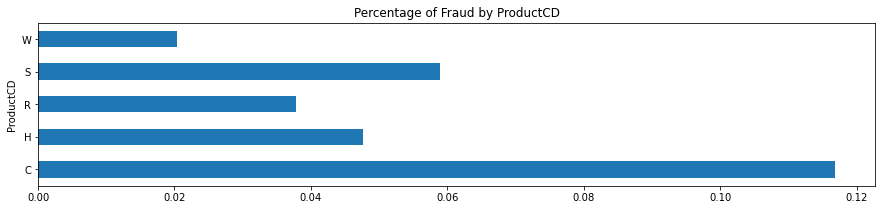

In [17]:
train_transaction.groupby('ProductCD')['TransactionID'].count().sort_index().plot(kind='barh',figsize=(15, 3),title='Observations by ProductCD')
plt.show()

train_transaction.groupby('ProductCD')['isFraud'].mean().sort_index().plot(kind='barh',figsize=(15, 3),title='Percentage of Fraud by ProductCD')
plt.show()

## card 1 - card 6
The following feautres are mentioned as categorical but appear to be numeric in nature.

In [18]:
card_cols = [c for c in train_transaction.columns if 'card' in c]
train_transaction[card_cols].head()

,card1,card2,card3,card4,card5,card6
0,13926,NaN,150.0,discover,142.0,credit
1,2755,404.0,150.0,mastercard,102.0,credit
2,4663,490.0,150.0,visa,166.0,debit
3,18132,567.0,150.0,mastercard,117.0,debit
4,4497,514.0,150.0,mastercard,102.0,credit
